# Plotting Corona virus

Er zijn verschillende websites die visualisaties maken van het corona virus. Een bekende is 

https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

Maar hoe wordt die gemaakt? In dit notebook kijken we naar verschillende visualisaties van het virus. Data kun je vinden op 

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data


## Geomap

Laten we kijken naar de confirmed cases op een map. De data is gehaald van de website. Note: mplleaflet moet je mogelijk installeren. Dat kan met pip install

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import mplleaflet
import warnings

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"
file = "03-21-2020.csv"
data = pd.read_csv(url+file)
lat = np.array(data['Latitude'])
long = np.array(data['Longitude'])
size = np.array(data['Confirmed'])
data.head()


,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-21T10:13:08,67800,3139,58946,30.9756,112.2707
1,NaN,Italy,2020-03-21T17:43:03,53578,4825,6072,41.8719,12.5674
2,NaN,Spain,2020-03-21T13:13:30,25374,1375,2125,40.4637,-3.7492
3,NaN,Germany,2020-03-21T20:43:02,22213,84,233,51.1657,10.4515
4,NaN,Iran,2020-03-21T11:13:12,20610,1556,7635,32.4279,53.6880


In [2]:
warnings.filterwarnings('ignore')
def leaflet_plot_location(lon=[5.8878] , lat=[52.0614], size=[200]):
    scale = size.max() - size.min()
    size = size / scale * 10000
    
    plt.figure(figsize=(8,8))

    zipped = zip(lon, lat, size)
    plt.scatter(lon, lat, c='r', alpha=0.7, s=size)

    return mplleaflet.display()

leaflet_plot_location(lon=long, lat=lat, size = size)

Dit is natuurlijk een interessante visualisatie maar er is nog veel meer te inspecteren. 

## Opdracht plotjes

maak een barplot van 4 landen

In [4]:
#allereerst maken we de data zo klein dat ze maar vier landen bevatten
data = data[0:4]
data

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-21T10:13:08,67800,3139,58946,30.9756,112.2707
1,NaN,Italy,2020-03-21T17:43:03,53578,4825,6072,41.8719,12.5674
2,NaN,Spain,2020-03-21T13:13:30,25374,1375,2125,40.4637,-3.7492
3,NaN,Germany,2020-03-21T20:43:02,22213,84,233,51.1657,10.4515


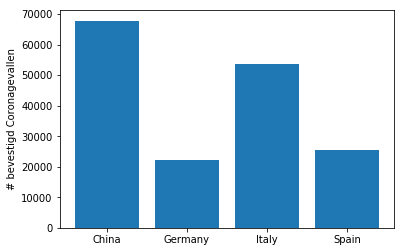

In [5]:
# bepaal voor de x de landen, voor de hoogte nemen we de confirmed kolom
plt.figure()
plt.ylabel('# bevestigd Coronagevallen')
plt.bar(x = data['Country/Region'], height = data['Confirmed'])
plt.show()

## Time series
Laten we eens naar de time series data kijken

In [5]:
#Allereerst laden we de data

In [6]:
import pandas as pd
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
data_t = pd.read_csv(url)
data_t.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,70,75,82,114,147,177,212,272,322,411
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,701,773,839,825,878,889,924,963,1007
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,200,212,226,243,266,313,345,385,432
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,197,238,428,566,673,790,900,1030,1183


In [7]:
def reformat(data_t):
    data_t.index = data_t['Country/Region']
    data_t = data_t.drop('Province/State', axis = 1)
    data_t = data_t.drop('Country/Region', axis = 1)
    data_t = data_t.drop('Lat', axis = 1)
    data_t = data_t.drop('Long', axis = 1)
    return data_t

data_t = reformat(data_t)
data_t.head()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Thailand,2,3,5,7,8,8,14,14,14,19,...,70,75,82,114,147,177,212,272,322,411
Japan,2,1,2,2,4,4,7,7,11,15,...,639,701,773,839,825,878,889,924,963,1007
Singapore,0,1,3,3,4,5,7,7,10,13,...,178,200,212,226,243,266,313,345,385,432
Nepal,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Malaysia,0,0,0,3,4,4,4,7,8,8,...,149,197,238,428,566,673,790,900,1030,1183


In [8]:
#check zit Nederland erin?
nl = data_t.loc[r"Netherlands"].values.tolist()
print(nl)


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 6, 10, 18, 24, 38, 82, 128, 188, 265, 321, 382, 503, 503, 804, 959, 1135, 1413, 1705, 2051, 2460, 2994, 3631], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 3, 3, 3, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 4, 4, 5, 5], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]


In [9]:
#Nederland zit er twee keer in, Nederland en curacao
#check zit Nederland erin? Ik wil alleen Nederland
nl = data_t.loc[r"Netherlands"].values.tolist()[0]
print(nl)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 6, 10, 18, 24, 38, 82, 128, 188, 265, 321, 382, 503, 503, 804, 959, 1135, 1413, 1705, 2051, 2460, 2994, 3631]


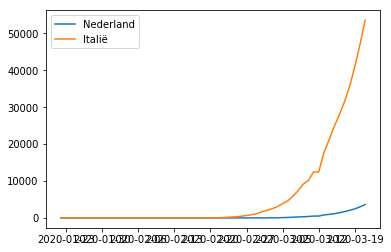

In [10]:
# dan laden we x en y
nl = data_t.loc[r"Netherlands"].values.tolist()[0]
it = data_t.loc[r"Italy"].values.tolist()
x = pd.date_range('1/22/2020', periods = len(nl), freq ='d') 
plt.plot(x, nl, label="Nederland")
plt.plot(x, it, label="Italië")
plt.legend()
plt.show()

# Opdracht
1. Maak de labels van de time series mooier. Plot ook Sweden of andere landen. Maak een zwarte achtergrond met dikke lijnen


# Opdracht uitwerking

Om de opdracht goed uit te kunnen voeren ga ik eerst op internet en in de documentatie zoeken hoe ik dit kan doen. Ik vind het volgende

voor dikke lijnen kan ik gewoon een optie meegegeven in de plot functie. Ik had gegoogled op 'change line thickness in matplotlib plot' en vond toen deze pagina

    https://pythonprogramming.net/graphing-matplotlib-python-part-3-colors-line-thickness/

ik kies ervoor om `plt.plot(x, nl, label="Nederland", linewidth=5)` te gebruiken

Voor de date time thicks moet ik wat langer zoeken. Ik google op keywords zoals display datetime format x label matplotlib en vind een sites zoals

    https://stackoverflow.com/questions/5498510/creating-graph-with-date-and-time-in-axis-labels-with-matplotlib
    https://matplotlib.org/3.2.0/gallery/text_labels_and_annotations/date.html
    
Ik probeer wat uit en ik kom uiteindelijk op de volgende code
    
    import matplotlib.dates as mdates
    days = mdates.WeekdayLocator()
    daysFmt = mdates.DateFormatter('%m-%d')

    ax = plt.gca() 
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)

om de achtergrond zwart te maken vind ik verschillende oplossingen. zie 
    
    https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color

Ik kies ervoor om de `ax.patch.set_facecolor('black')` te gebruiken omdat ik toch al een ax gebruikt heb

Mijn oplossing ziet er als volgt uit

In [19]:
import re
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import NullFormatter
from matplotlib.dates import DateFormatter
#dan laden we x en y

#x-waarden moeten datetime waarden zijn van 1/22/2020 tot en met 3/17/2030
x = pd.date_range('1/22/2020', periods = len(nl), freq ='d') 

#y-waarden zijn de rijen per land aan eenvolgende data
nl = data_t.loc[r"Netherlands"].values.tolist()[0]
it = data_t.loc[r"Italy"].values.tolist()
sw = data_t.loc[r"Sweden"].values.tolist()
ir = data_t.loc[r"Iran"].values.tolist()
be = data_t.loc[r"Belgium"].values.tolist()
sp = data_t.loc[r"Spain"].values.tolist()
ch = data_t.loc[r"China"].values.tolist()[0]

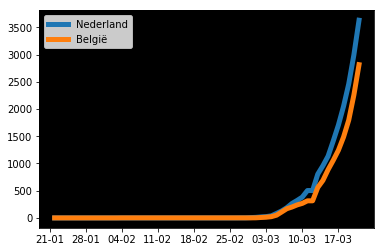

In [21]:
#plot de landen met dikke lijnen
plt.plot(x, nl, label="Nederland", linewidth=5)
#plt.plot(x, it, label="Italië", linewidth=5)
#plt.plot(x, ir, label="Iran", linewidth=5)
#plt.plot(x, sw, label="Zweden", linewidth=5)
plt.plot(x, be, label="België", linewidth=5)
#plt.plot(x, sp, label="Spain", linewidth=5)
plt.legend()

# dit heb ik opgezocht op internet. 
# dit is een trucje om de data in een mooi formaat van de x-as labels te krijgen
import matplotlib.dates as mdates
days = mdates.WeekdayLocator()
daysFmt = mdates.DateFormatter('%d-%m')
ax = plt.gca() 
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
#einde trucje voor mooie x-as

#zet nu achtergrond op zwart
ax.patch.set_facecolor('black')

plt.show()


# Challenge
Maak een plot van confirmed, death en recovered. De data staat op https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

Deze opdracht kan op verschillende manieren. Dat kan een barplot zijn van alle landen, een timeseries van enkele landen etc. Het is maar net hoe je de onderzoeksvraag wilt beantwoorden. Er is geen 1 antwoord maar meerdere antwoorden op deze vraag. Ik besluit om een barplot te maken met totalen per categorie en % Daarvoor heb ik een sommatie nodig van alle landen. 

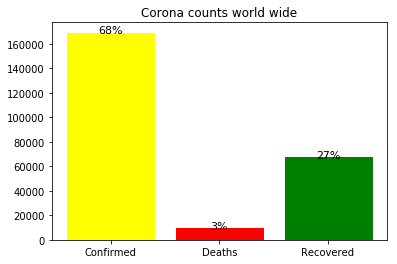

In [13]:
#sommatie van alle rijen uit de dataframe
confirmed = data['Confirmed'].sum()
deaths = data['Deaths'].sum()
recovered = data['Recovered'].sum()
#laad x en y
x =['Confirmed', 'Deaths', 'Recovered']
y =[confirmed, deaths, recovered]
#maak plotjes met kleuren en titel
bars = plt.bar(x=x, height=y)
bars[0].set_color('yellow')
bars[1].set_color('red')
bars[2].set_color('green')
plt.title('Corona counts world wide')
total = confirmed + deaths + recovered
# plot percentages 
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 500, str(int(height/total*100)) + '%', 
                 ha='center', color='black', fontsize=11)
plt.show()

## Data object

Maak een object dat de data laadt en in een x, y format opslaat
gebruik nu dat object voor een plaatje. Mijn oplossing is een uitwerking waarbij meerdere landen geplot kunnen worden. De opdracht was maar 1, dus als je dat gedaan hebt is dat ook goed.  
Je kunt je oplossing zelf ook zo mooi mogelijk maken als je wilt. 

In [14]:
class Datamodel:
    def __init__(self, df, country):
        self.country = country                              #lijst van country indexen
        self.df = df                                        #dataframe
        self.y = df.loc[country].values.tolist()
        self.label = df.loc[country].index.values.tolist()
        self.x = pd.date_range('1/22/2020', periods = len(self.y[0]), freq ='d')               
        
    def __repr__(self):
        return "dit is een datamodel voor landen {} met waarden \n {}".format(self.label,self.y ) 

    def plot_data(self):
        for i in range(len(self.y)):
            plt.plot(self.x,self.y[i], label = self.label[i], linewidth=3)
        plt.legend()
        daysFmt = mdates.DateFormatter('%d-%m')
        ax = plt.gca() 
        ax.xaxis.set_major_locator(days)
        ax.xaxis.set_major_formatter(daysFmt)
        #zet nu achtergrond op zwart
        ax.patch.set_facecolor('black')
        plt.show()
        

dit is een datamodel voor landen ['Netherlands', 'Netherlands', 'Netherlands', 'Netherlands', 'Italy'] met waarden 
 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 6, 10, 18, 24, 38, 82, 128, 188, 265, 321, 382, 503, 503, 804, 959, 1135, 1413, 1705, 2051, 2460, 2994, 3631], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 3, 3, 3, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 4, 4, 5, 5], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 20, 62, 155, 229, 3

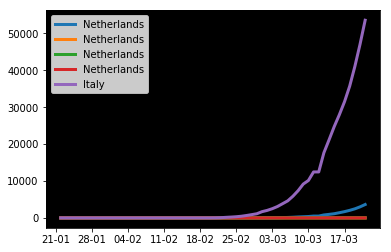

In [15]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
data_t = pd.read_csv(url)
data_t = reformat(data_t)
dm = Datamodel(data_t, [r"Netherlands", "Italy"])
print(dm)
dm.plot_data()